# Data Augmentation 

Data Augmentation is techniques used to generate new images from the originals. Examples of these techniques is changing colors, flipping, cropping or tweeking the images in some way, but to keep the class labels the same way. The goal of applying these techniques is to increase generalization of the model. It helps with over-fitting, makes the model more invariant to new unseen data, and learns more important/robust features. 




In [1]:
import PIL
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import time
import os
import copy
import math
print(torch.__version__)
plt.ion()   # interactive mode

1.3.0+cpu


In [51]:
mpl.rcParams['axes.grid'] = False
mpl.rcParams['image.interpolation'] = 'nearest'
mpl.rcParams['figure.figsize'] = 15, 25

def show_dataset(dataset, n=6):
    img = np.vstack([np.hstack([(dataset[i][0]) for _ in range(n)])
                   for i in range(len(dataset))])
    plt.imshow(img)
    plt.axis('off')

In [ ]:
transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.ColorJitter(hue=.05, saturation=.05),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomVerticalFlip(),
    torchvision.transforms.RandomRotation(20, resample=PIL.Image.BILINEAR)
])

## Color

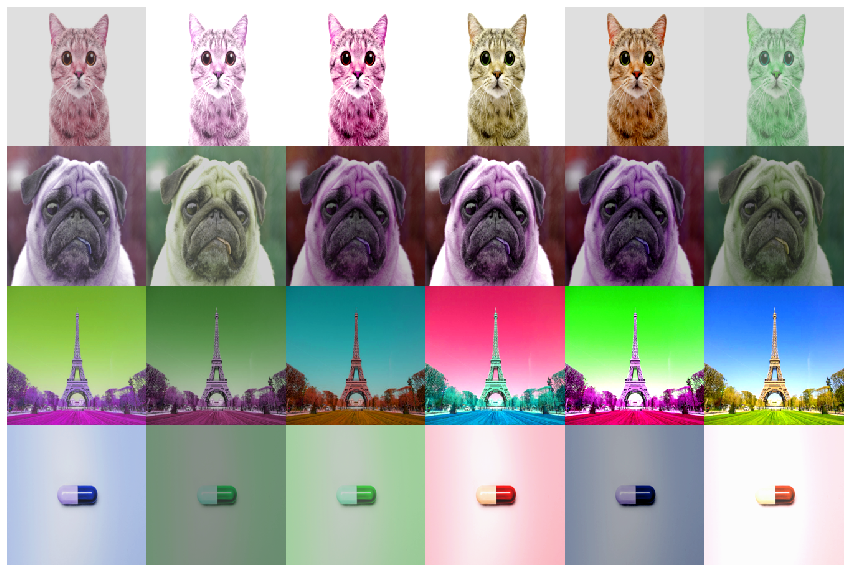

In [71]:
color = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.ColorJitter(hue=.4,
                                       saturation=.4, 
                                       brightness=.4,
                                       contrast=.4)
])
dataset = datasets.ImageFolder('../numerical_examples/data/examples', 
                               transform=color)
show_dataset(dataset)

## Flipping

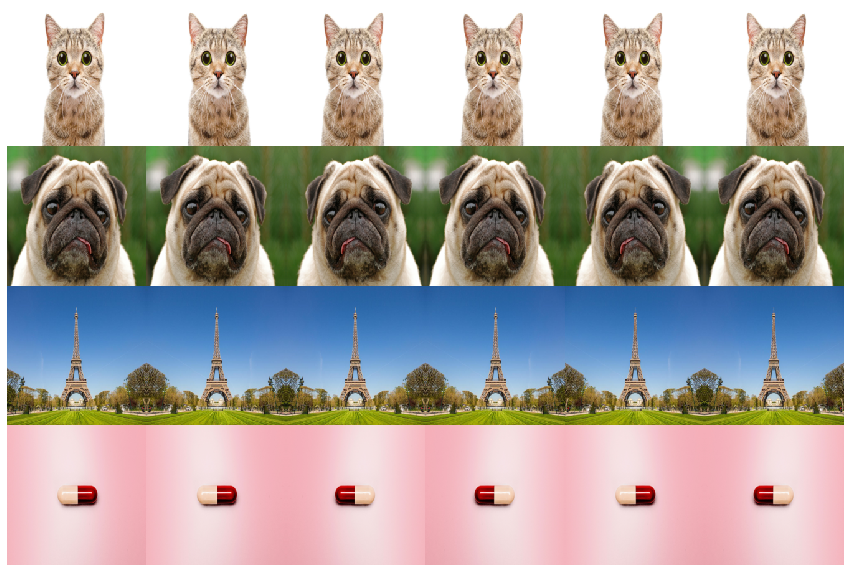

In [53]:
flipping_horizontal = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.RandomHorizontalFlip()
])
dataset = datasets.ImageFolder('../numerical_examples/data/examples', 
                               transform=flipping_horizontal)
show_dataset(dataset)

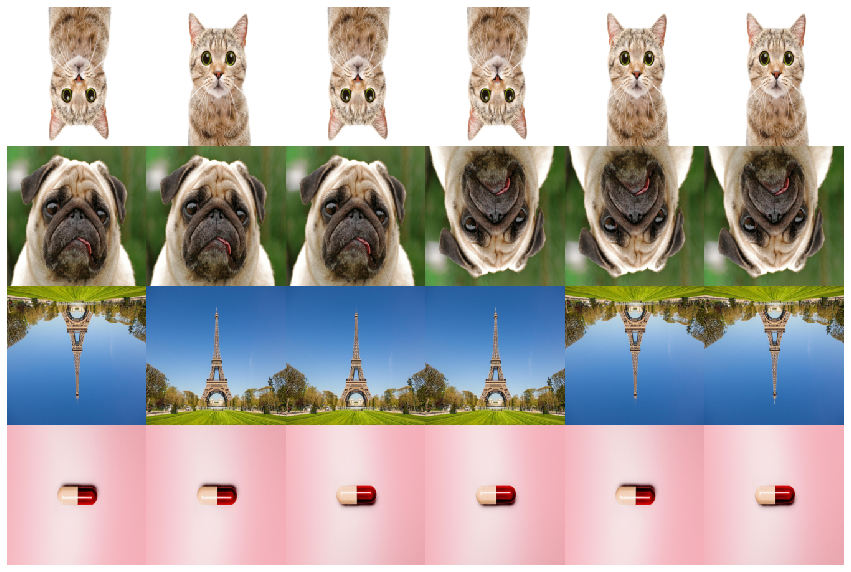

In [75]:
flipping_vertical = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.RandomVerticalFlip()
])
dataset = datasets.ImageFolder('../numerical_examples/data/examples', 
                               transform=flipping_vertical)
show_dataset(dataset)

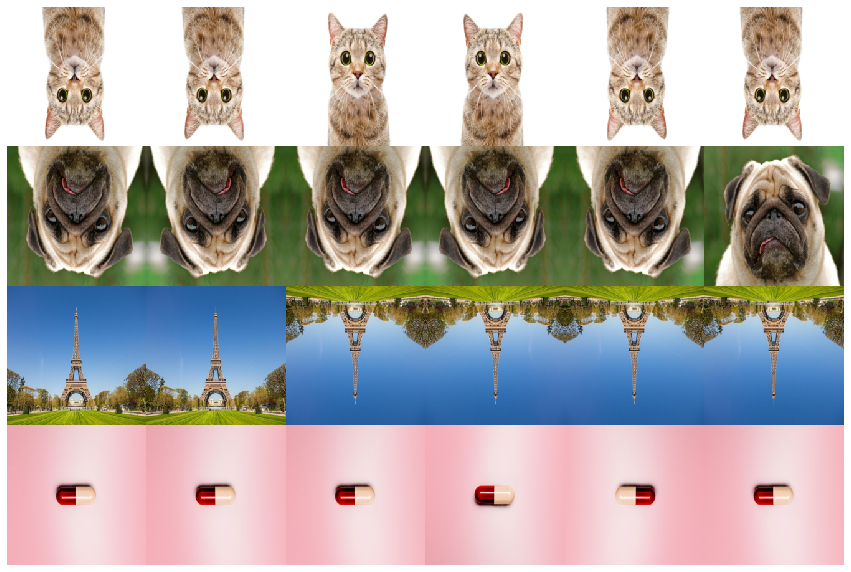

In [55]:
flipping = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.RandomVerticalFlip(),
    torchvision.transforms.RandomHorizontalFlip()
])
dataset = datasets.ImageFolder('../numerical_examples/data/examples', 
                               transform=flipping)
show_dataset(dataset)

## Rotation

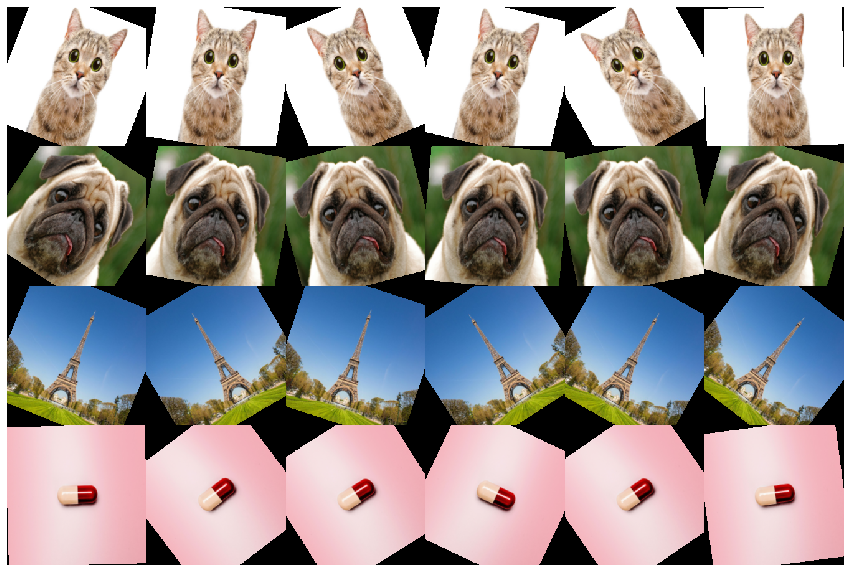

In [57]:
rotation = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.RandomRotation(40, resample=PIL.Image.BILINEAR)
])
dataset = datasets.ImageFolder('../numerical_examples/data/examples', 
                               transform=rotation)
show_dataset(dataset)

## Perspective

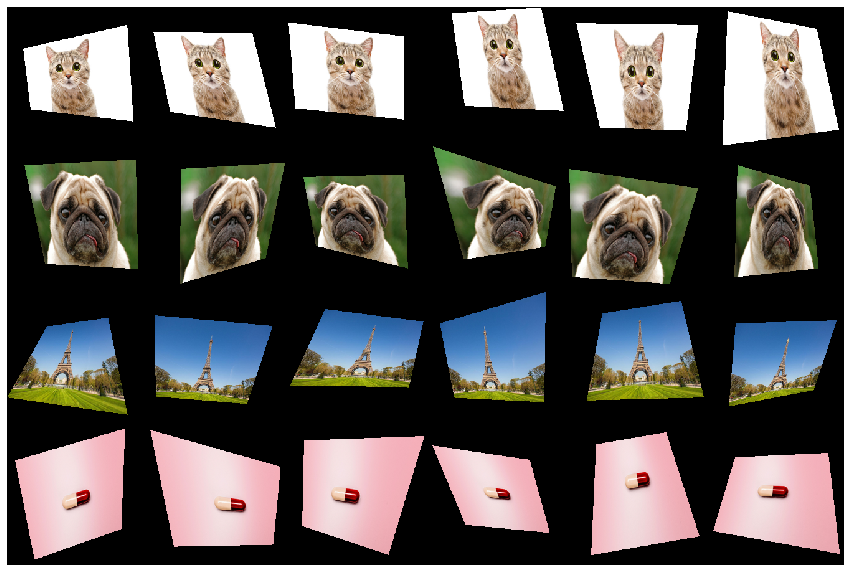

In [66]:
perspective = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.RandomPerspective(distortion_scale=0.6, p=1, interpolation=3)
])
dataset = datasets.ImageFolder('../numerical_examples/data/examples', 
                               transform=perspective)
show_dataset(dataset)

## Crop and resize

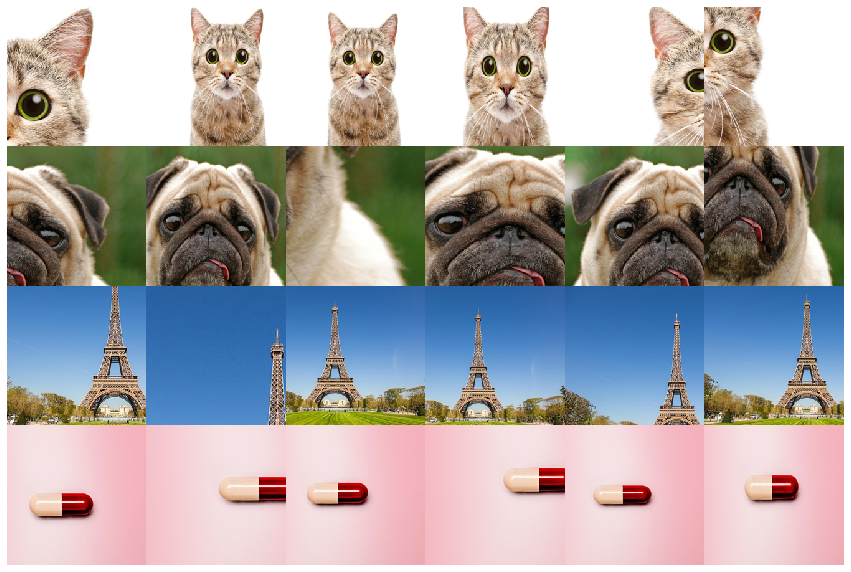

In [68]:
crop_resize = torchvision.transforms.Compose([
    torchvision.transforms.RandomResizedCrop(224, # image resize size
                                             scale=(0.08, 1.0), # range of size compared to the origin
                                             ratio=(0.75, 1.3333333333333333), # aspect ratio
                                             interpolation=3)
])
dataset = datasets.ImageFolder('../numerical_examples/data/examples', 
                               transform=crop_resize)
show_dataset(dataset)

## Everything together

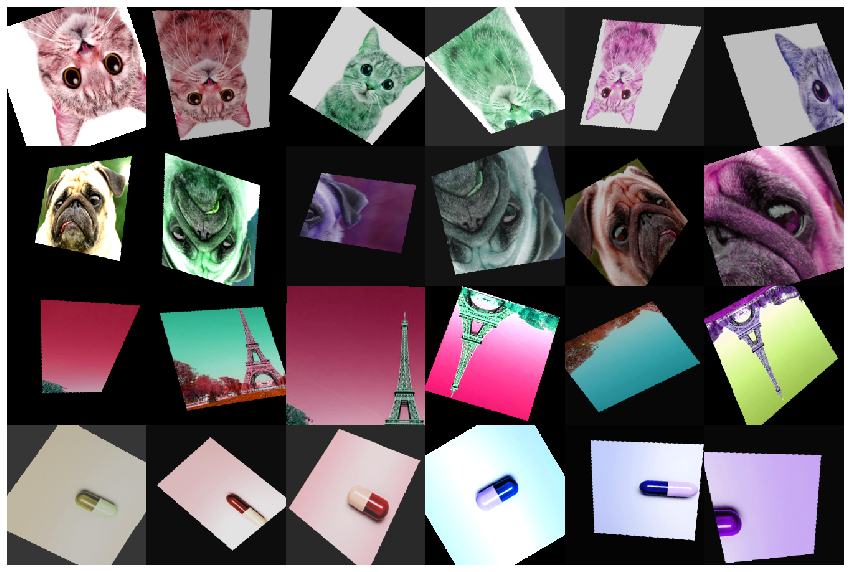

In [73]:
everything = torchvision.transforms.Compose([
    torchvision.transforms.RandomResizedCrop(224, scale=(0.08, 1.0), ratio=(0.75, 1.33), interpolation=3),
    torchvision.transforms.RandomPerspective(distortion_scale=0.6, p=0.7, interpolation=3),
    torchvision.transforms.RandomRotation(40, resample=PIL.Image.BILINEAR),
    torchvision.transforms.RandomVerticalFlip(),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ColorJitter(hue=.4, saturation=.4, brightness=.4,contrast=.4)
    
])
dataset = datasets.ImageFolder('../numerical_examples/data/examples', 
                               transform=everything)
show_dataset(dataset, n = 6)